In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

%matplotlib inline
#plt.rcParams['figure.figsize'] = (20, 20)
plt.style.use('ggplot')

## Exploratory Analysis and data cleaning 
### Precipitaciones

In [2]:
#Import file precipitaciones
prec_df = pd.read_csv("./precipitaciones.csv")
prec_df.head(10)

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.000000,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.000000,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.000000,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.000000,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.000000,12.080715,56.233424,96.364235,155.622235
5,2015-01-01,0.239366,0.025617,0.365453,0.000000,0.011922,0.001170,0.005331,1.462817
6,2016-03-01,1.410340,0.173750,0.056896,0.000000,0.464601,15.188883,28.314859,42.045866
7,2020-03-01,0.003451,0.000666,0.000000,0.000000,0.115566,12.462699,28.310937,73.640866
8,1988-12-01,3.605386,7.686461,5.764245,1.353364,5.670358,29.855126,61.418941,105.088928
9,2015-12-01,0.272739,0.283084,0.688792,0.410341,0.513311,20.054594,71.496481,103.072700


In [3]:
prec_df.dtypes

date                                    object
Coquimbo                               float64
Valparaiso                             float64
Metropolitana_de_Santiago              float64
Libertador_Gral__Bernardo_O_Higgins    float64
Maule                                  float64
Biobio                                 float64
La_Araucania                           float64
Los_Rios                               float64
dtype: object

In [4]:
prec_df.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673


In [5]:
#See if there are duplicates or nulls
print("Duplicates: ",prec_df[prec_df.duplicated()].shape[0])
print("Null values:\n", prec_df.isnull().sum())

Duplicates:  0
Null values:
 date                                   0
Coquimbo                               0
Valparaiso                             0
Metropolitana_de_Santiago              0
Libertador_Gral__Bernardo_O_Higgins    0
Maule                                  0
Biobio                                 0
La_Araucania                           0
Los_Rios                               0
dtype: int64


In [6]:
#change date column type to datetime
prec_df['date'] =  pd.to_datetime(prec_df['date'])
#sort dataframe by date column
prec_df = prec_df.sort_values("date")
prec_df = prec_df.reset_index(drop=True)

Data looks good, no nulls or duplicates, correct data types... now lets create some visualizations to know more about the data...

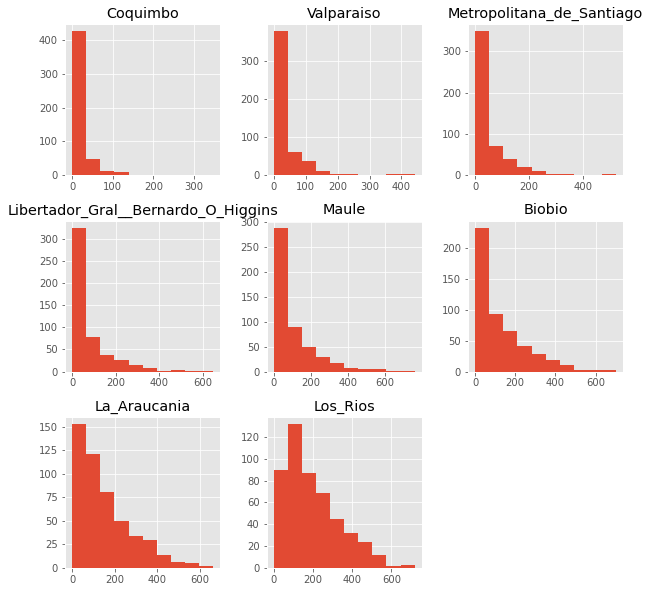

In [7]:
prec_df.hist(figsize=(10,10))
plt.show()

We can see that the distributions resembles a log-normal.

In [8]:
#Create a new pivoted df and add a "month" and "year" columns
prec_df_pv = prec_df.melt(id_vars=["date"], var_name="Region", value_name="mm")
prec_df_pv["Month"] = pd.DatetimeIndex(prec_df_pv['date']).month
prec_df_pv["Year"] = pd.DatetimeIndex(prec_df_pv['date']).year
prec_df_pv

,date,Region,mm,Month,Year
0,1979-01-01,Coquimbo,2.641948,1,1979
1,1979-02-01,Coquimbo,1.179804,2,1979
2,1979-03-01,Coquimbo,0.255490,3,1979
3,1979-04-01,Coquimbo,10.173699,4,1979
4,1979-05-01,Coquimbo,1.039098,5,1979
...,...,...,...,...,...
3963,2019-12-01,Los_Rios,62.170090,12,2019
3964,2020-01-01,Los_Rios,63.389625,1,2020
3965,2020-02-01,Los_Rios,55.838889,2,2020
3966,2020-03-01,Los_Rios,73.640866,3,2020


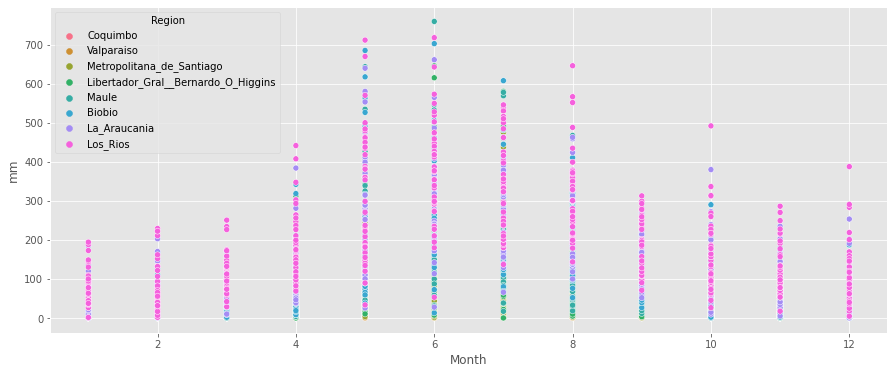

In [9]:
#make a scatter plot to see how data is distributed among months
fig = plt.gcf()
fig.set_size_inches(15, 6)
sb.scatterplot(data = prec_df_pv, x = "Month", y = "mm", hue = "Region")
plt.show()

The data makes sense, as we go south there are more rain. And also there are no significant outliers. 
Now let see the next data file...

### Banco Central

In [10]:
#Import data from Banco Central
bc_df = pd.read_csv("./banco_central.csv")
print(bc_df.shape)
bc_df.head(2)

(614, 85)


,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,867.806.065,968.087.179,914.276.663,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0


In [11]:
#Keep only Imacec and PIB columns
bc_df=bc_df.filter(regex=("Periodo|Imacec.*|PIB.*"))
#Get proportion of missing data
missing = bc_df.isnull().sum()/len(bc_df)*100
print(missing) #too much missing data!

#drop rows with missing data
bc_df.dropna(inplace=True)
print(bc_df.shape)

Periodo                                          0.000000
Imacec_empalmado                                51.140065
Imacec_produccion_de_bienes                     51.140065
Imacec_minero                                   51.140065
Imacec_industria                                50.977199
Imacec_resto_de_bienes                          51.140065
Imacec_comercio                                 50.977199
Imacec_servicios                                51.140065
Imacec_a_costo_de_factores                      51.140065
Imacec_no_minero                                51.140065
PIB_Agropecuario_silvicola                      84.364821
PIB_Pesca                                       84.527687
PIB_Mineria                                     84.527687
PIB_Mineria_del_cobre                           84.527687
PIB_Otras_actividades_mineras                   84.364821
PIB_Industria_Manufacturera                     83.876221
PIB_Alimentos                                   84.527687
PIB_Bebidas_y_

The whole data has too many missing values, so it it is not a good idea to complete them using a method like replacing them by the mean or mode, since this would bias the results. So I just drop the null values, and now the data starts from 2013 onwards. 

Also, I kept only IMACEC and PIB columns becuase these were the ones I could fix their numbers (by doing some investigation of the ranges of their values), but for the rest I would need more investigation.

In [12]:
#drop duplicates
print("Duplicates: ",bc_df[bc_df.duplicated()].shape[0])
bc_df.drop_duplicates(keep="first",inplace=True)
print(bc_df.shape)

Duplicates:  2
(93, 38)


In [13]:
#change Periodo column type to datetime
bc_df['Periodo'] = bc_df['Periodo'].str[:10]
bc_df['Periodo'] =  pd.to_datetime(bc_df['Periodo'])

#sort dataframe by Periodo 
bc_df = bc_df.sort_values("Periodo")
bc_df = bc_df.reset_index(drop=True)
bc_df.head(5)

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,PIB
0,2013-01-01,955.390.761,100.972.392,951.782.571,996.182.997,107.279.578,989.771.184,910.860.098,956.036.061,955.835.968,...,209.196.716,53.672.742,36.993.507,571.866.642,123.185.498,821.085.632,762.087.515,506.965.418,100.532.954,109.771.386
1,2013-02-01,905.359.721,965.327.896,857.151.818,919.470.918,110.141.425,957.520.493,855.578.564,907.151.204,911.308.002,...,205.024.106,516.098.618,321.339.691,573.744.733,111.314.028,799.789.737,666.776.635,509.757.835,953.924.171,104.022.977
2,2013-03-01,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,202.838.669,546.694.889,337.915.263,5.691.837,11.393.886,793.471.519,140.103.913,512.994.015,108.482.797,118.109.613
3,2013-04-01,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,209.310.713,544.306.818,348.801.015,565.071.466,121.229.491,80.455.108,144.685.333,511.803.995,107.193.235,116.809.697
4,2013-05-01,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,206.481.563,536.681.481,355.711.814,571.394.036,125.792.137,805.307.434,147.859.706,512.469.359,107.210.039,116.784.548


Now we are ready to fix the numeric values: for Imacec the values should be something between 80 and 120, so we have to put the comma in the correct position. And for PIB, lets just convert to number becuase the values should be big amounts of money.

In [14]:
#pivot the data frame so now we only have one column with the values
bc_df_pv = bc_df.melt(id_vars=["Periodo"], var_name="Cuenta", value_name="Valor")

#delete the dots, convert to number and position the comma in the right place
bc_df_pv["Valor"] = bc_df_pv["Valor"].str.replace(".","")
bc_df_pv["Valor"] = np.where(bc_df_pv["Cuenta"].str.contains("Imacec"), "0." + bc_df_pv["Valor"], bc_df_pv["Valor"])
bc_df_pv["Valor"] = pd.to_numeric(bc_df_pv["Valor"])
bc_df_pv["Valor"] = np.where((bc_df_pv["Cuenta"].str.contains("Imacec")) & (bc_df_pv["Valor"]>=0.2), bc_df_pv["Valor"]*100, bc_df_pv["Valor"])
bc_df_pv["Valor"] = np.where((bc_df_pv["Cuenta"].str.contains("Imacec")) & (bc_df_pv["Valor"]<0.2), bc_df_pv["Valor"]*1000, bc_df_pv["Valor"])

#finally pivot the table again to have each variable in separated columns
bc_df_pv2 = pd.pivot_table(bc_df_pv, values="Valor", index="Periodo", columns="Cuenta")
bc_df_pv2.reset_index( drop=False, inplace=True )
bc_df_pv2.head(5)
#bc_df_pv2.to_excel("output3.xlsx")

Cuenta,Periodo,Imacec_a_costo_de_factores,Imacec_comercio,Imacec_empalmado,Imacec_industria,Imacec_minero,Imacec_no_minero,Imacec_produccion_de_bienes,Imacec_resto_de_bienes,Imacec_servicios,...,PIB_Quimica,PIB_Refinacion_de_petroleo,PIB_Restaurantes_y_hoteles,PIB_Servicios_de_vivienda,PIB_Servicios_empresariales,PIB_Servicios_financieros,PIB_Servicios_personales,PIB_Textil,PIB_Transporte,PIB_a_costo_de_factores
0,2013-01-01,95.603606,98.977118,95.539076,99.618300,95.178257,95.583597,100.972392,107.279578,91.086010,...,184976213.0,99887991.0,209196716.0,821085632.0,123185498.0,571866642.0,762087515.0,310805622.0,53672742.0,100532954.0
1,2013-02-01,90.715120,95.752049,90.535972,91.947092,85.715182,91.130800,96.532790,110.141425,85.557856,...,149519625.0,892533811.0,205024106.0,799789737.0,111314028.0,573744733.0,666776635.0,298216816.0,516098618.0,953924171.0
2,2013-03-01,103.163651,110.729395,102.796218,102.297537,97.855437,103.405852,105.468240,114.994919,100.064328,...,184460073.0,103469519.0,202838669.0,793471519.0,11393886.0,5691837.0,140103913.0,330305467.0,546694889.0,108482797.0
3,2013-04-01,101.937319,106.098291,101.664842,104.485589,92.733329,102.766884,99.927276,102.199311,102.600107,...,172638981.0,824530386.0,209310713.0,80455108.0,121229491.0,565071466.0,144685333.0,380345362.0,544306818.0,107193235.0
4,2013-05-01,101.953299,100.462117,101.642954,105.445361,96.133164,102.322796,99.395992,96.878906,104.083216,...,173785919.0,101629225.0,206481563.0,805307434.0,125792137.0,571394036.0,147859706.0,342850811.0,536681481.0,107210039.0


In [15]:
#for convinence, split the df so we have IMACEC and PIB in separated tables
bc_df_IMACEC = bc_df_pv2.filter(regex=("Periodo|Imacec.*"))
bc_df_PIB = bc_df_pv2.filter(regex=("Periodo|PIB.*"))


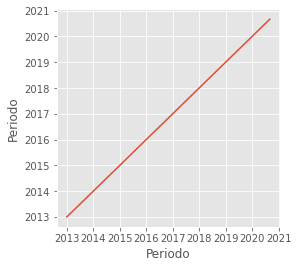

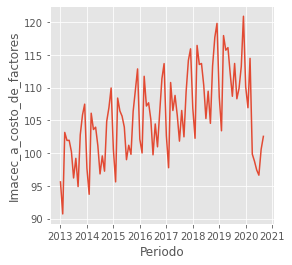

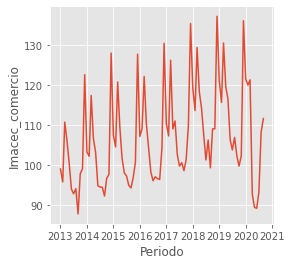

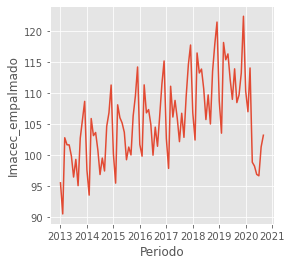

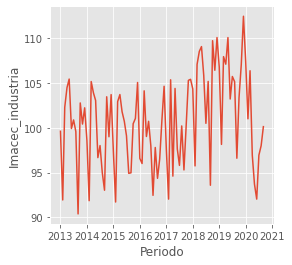

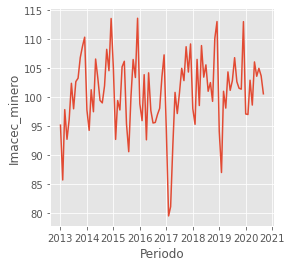

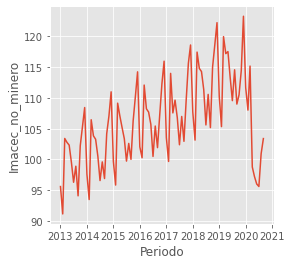

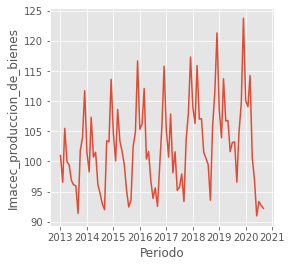

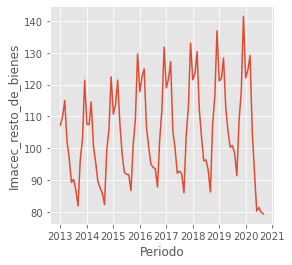

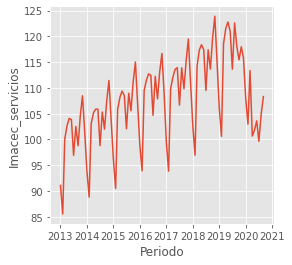

In [16]:
#create line charts for each IMACEC
for col in bc_df_IMACEC.columns:
    fig = plt.gcf()
    fig.set_size_inches(4, 4)
    sb.lineplot(data = bc_df_IMACEC, x="Periodo", y = col)
    plt.show()

For IMACEC columns we can see that the behavior is cyclical (seasonality, we can see repeating patterns over time) and we can see that in 2020 it fell down becuase of the pandemic. The data looks good.

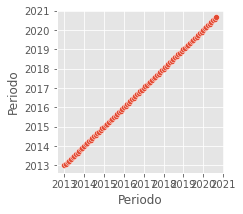

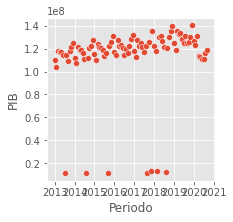

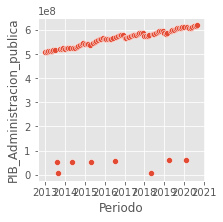

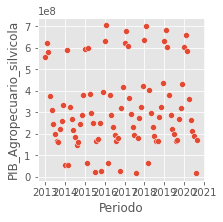

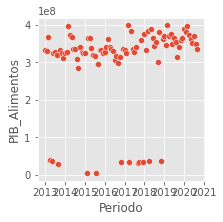

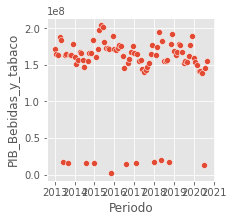

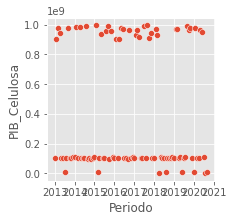

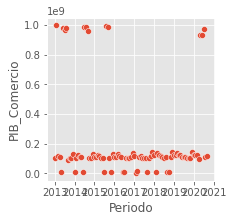

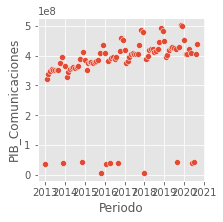

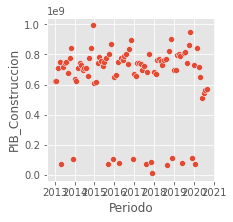

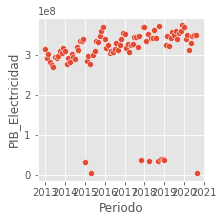

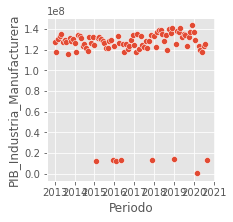

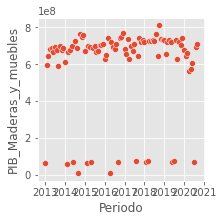

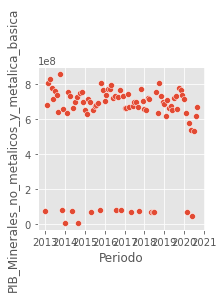

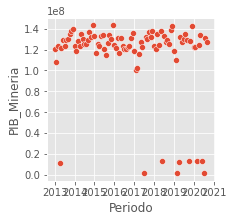

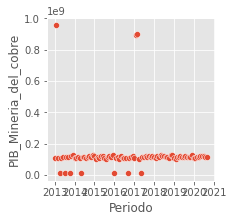

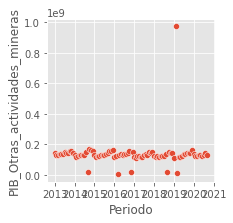

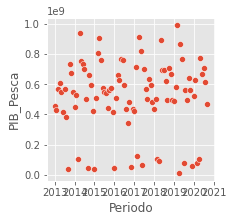

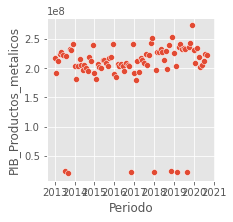

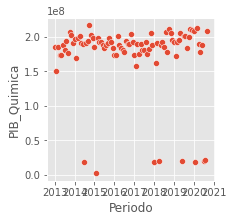

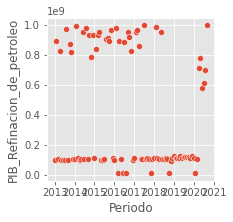

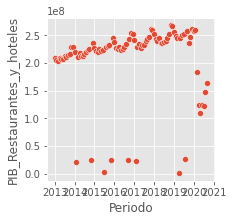

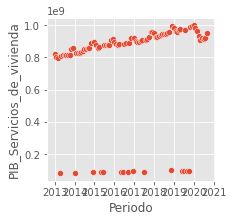

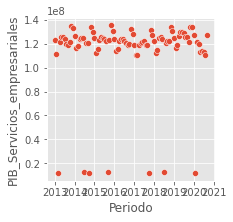

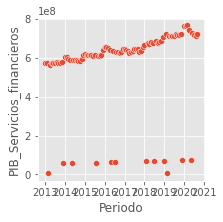

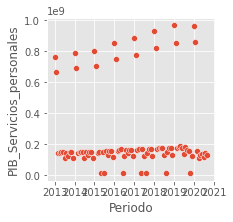

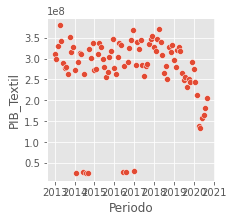

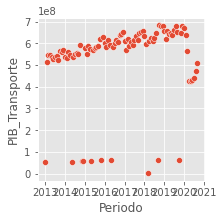

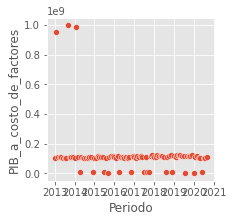

In [17]:
#create scatter plots for each PIB
for col1 in bc_df_PIB.columns:
    fig = plt.gcf()
    fig.set_size_inches(3, 3)
    sb.scatterplot(data = bc_df_PIB, x="Periodo", y = col1)
    plt.show()


We can see that, in general, PIBs are incresing over time, with some repeating patterns over time as well as IMACEC. Also, we can see that they have been increasing among the years, meaning that the economy is growing.

There are some outliers that we should take care of...

## Visualizations
### Rainfall during specific a period

In [18]:
def rainfall_on_period(region, date1, date2):
    
    #check if region is in the dataset
    if region not in prec_df:
        print("Incorrect Region")
        return
    
    #check if dates are in the dataset
    if (pd.Timestamp(date1) not in prec_df['date'].values):
        print ("Start date is not in data")
        return
    if (pd.Timestamp(date2) not in prec_df['date'].values):
        print ("End date is not in data")
        return
    
    #filter the dataframe by the dates
    prec_df_filtered = prec_df[(prec_df['date'] >= date1) & (prec_df['date'] <= date2)]
    
    #create the chart
    fig = plt.gcf()
    fig.set_size_inches(20, 4)
    sb.lineplot(data = prec_df_filtered, x="date", y = region)
    plt.show()
    
    return

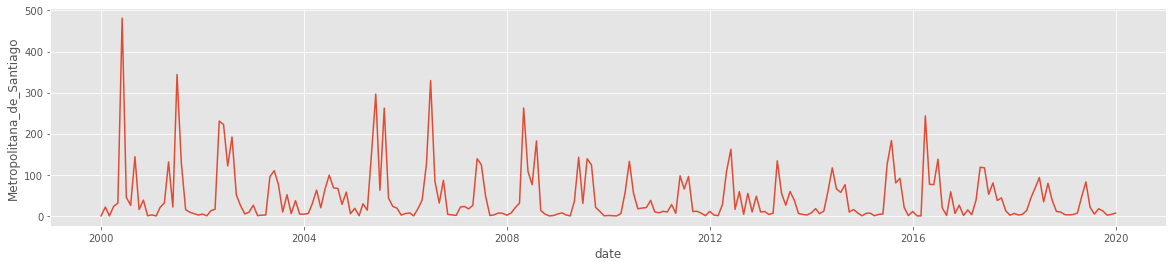

In [19]:
rainfall_on_period("Metropolitana_de_Santiago","2000-01-01","2020-01-01")

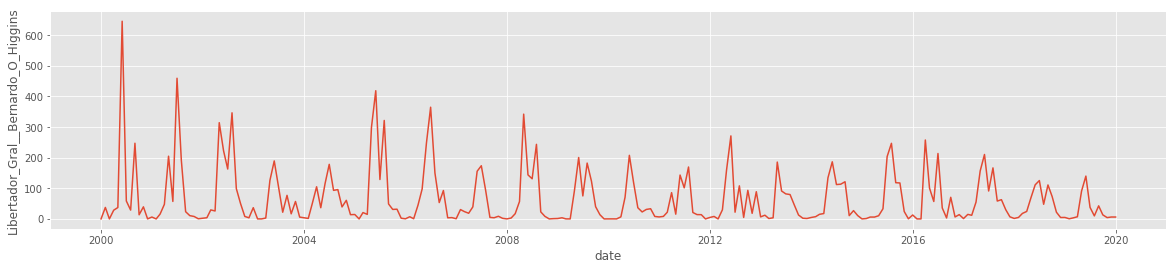

In [20]:
rainfall_on_period("Libertador_Gral__Bernardo_O_Higgins","2000-01-01","2020-01-01")

The rainfall amounts of these two regions are very similar, which was expected due to the geographic proximity, this is why they are highly correlated. And also in the charts we can see the seasonality of the rains and the decrease in rainfall over the years. 

### Rainfall by Month

In [21]:
def rains_by_months(years,region):
    
    #filter by region and years
    prec_df_filtered = prec_df_pv[(prec_df_pv['Region'] == region)]
    prec_df_filtered = prec_df_filtered[prec_df_filtered['Year'].isin(years)]
    
    #create column with month name
    month_names = {1:'Ene',2:'Feb',3:'Mar',4:'Abr',5:'May',6:'Jun',7:'Jul',8:'Ago',9:'Sep',10:'Oct',11:'Nov',12:'Dic'}
    prec_df_filtered["Month_name"] = prec_df_filtered["Month"].apply(lambda x: month_names[x])
    
    #create chart
    fig = plt.gcf()
    fig.set_size_inches(20, 4)
    sb.lineplot(data = prec_df_filtered, x = "Month_name", y = "mm", hue = "Year")
    plt.show()
    return

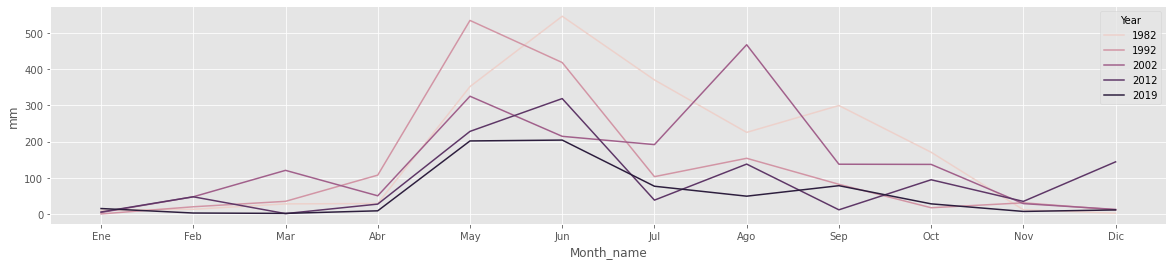

In [22]:
rains_by_months([1982,1992,2002,2012,2019],"Maule")

In this chart we can clearly see the months of the year were most of the rains happen. Also, we can see that the amount of rains are decreasing through the years.

### PIB historical series

In [23]:
def PIB_on_period(pibs, date1, date2=""):
    
    if date2 == "":
        date2 = max(bc_df_pv['Periodo'])
    
    #filter by pibs and dates
    bc_df_pv_filtered = bc_df_pv[bc_df_pv['Cuenta'].isin(pibs)]
    bc_df_pv_filtered = bc_df_pv_filtered[(bc_df_pv_filtered['Periodo'] >= date1) & (bc_df_pv_filtered['Periodo'] <= date2)]
    
    #create the chart
    fig = plt.gcf()
    fig.set_size_inches(20, 4)
    sb.lineplot(data = bc_df_pv_filtered, x = "Periodo", y = "Valor", hue = "Cuenta")
    plt.show()
    
    return

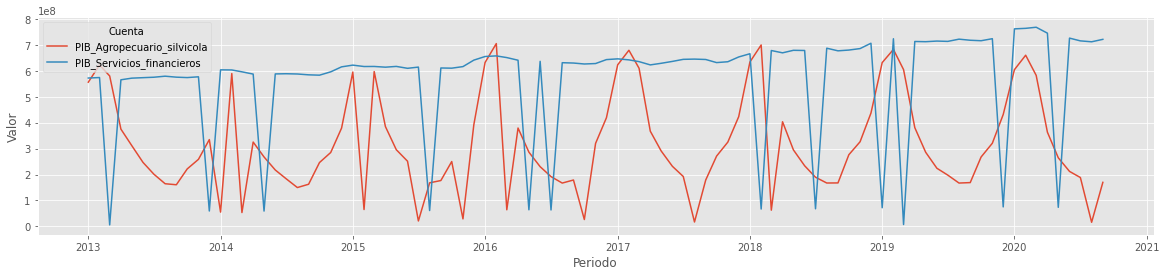

In [24]:
PIB_on_period(["PIB_Agropecuario_silvicola","PIB_Servicios_financieros"],"2013-01-01")

We see a cyclical behavior in both series, but I don't realy see a clear correlation between them.

## Feature Selection and variable creation

Let's use correlation matrices to apply feature selection. We should keep variables that are NOT highly correlated, becuase if they are, then we can "predict" or "explain" one variable using the other one, in other words, having two highly correlated variables does not bring much new information and can only add unnecessary complexity to the model. 

In [25]:
#the following function calculates the correlation between all the variables in absolute value, and then creates a list of
#highly correlated columns to drop from the data. It also plots a correlation matrix.
#The code (with some modifications) was found in:
#https://towardsdatascience.com/how-to-use-pairwise-correlation-for-robust-feature-selection-20a60ef7d10
def identify_correlated(df, threshold):
    """
    A function to identify highly correlated features.
    """
    # Compute correlation matrix with absolute values
    matrix = df.corr().abs()
    
    # Create a boolean mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Subset the matrix
    reduced_matrix = matrix.mask(mask)
    
    # Find cols that meet the threshold
    to_drop = [c for c in reduced_matrix.columns if \
              any(reduced_matrix[c] > threshold)]
    
    # Create cmap
    cmap = sb.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
    
    # Make figsize bigger
    fig, ax = plt.subplots(figsize=(20,20))
    
    # Plot the matrix
    _ = sb.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)
    
    return to_drop

['Imacec_a_costo_de_factores', 'Imacec_comercio', 'Imacec_empalmado', 'Imacec_industria', 'Imacec_no_minero', 'Imacec_produccion_de_bienes']


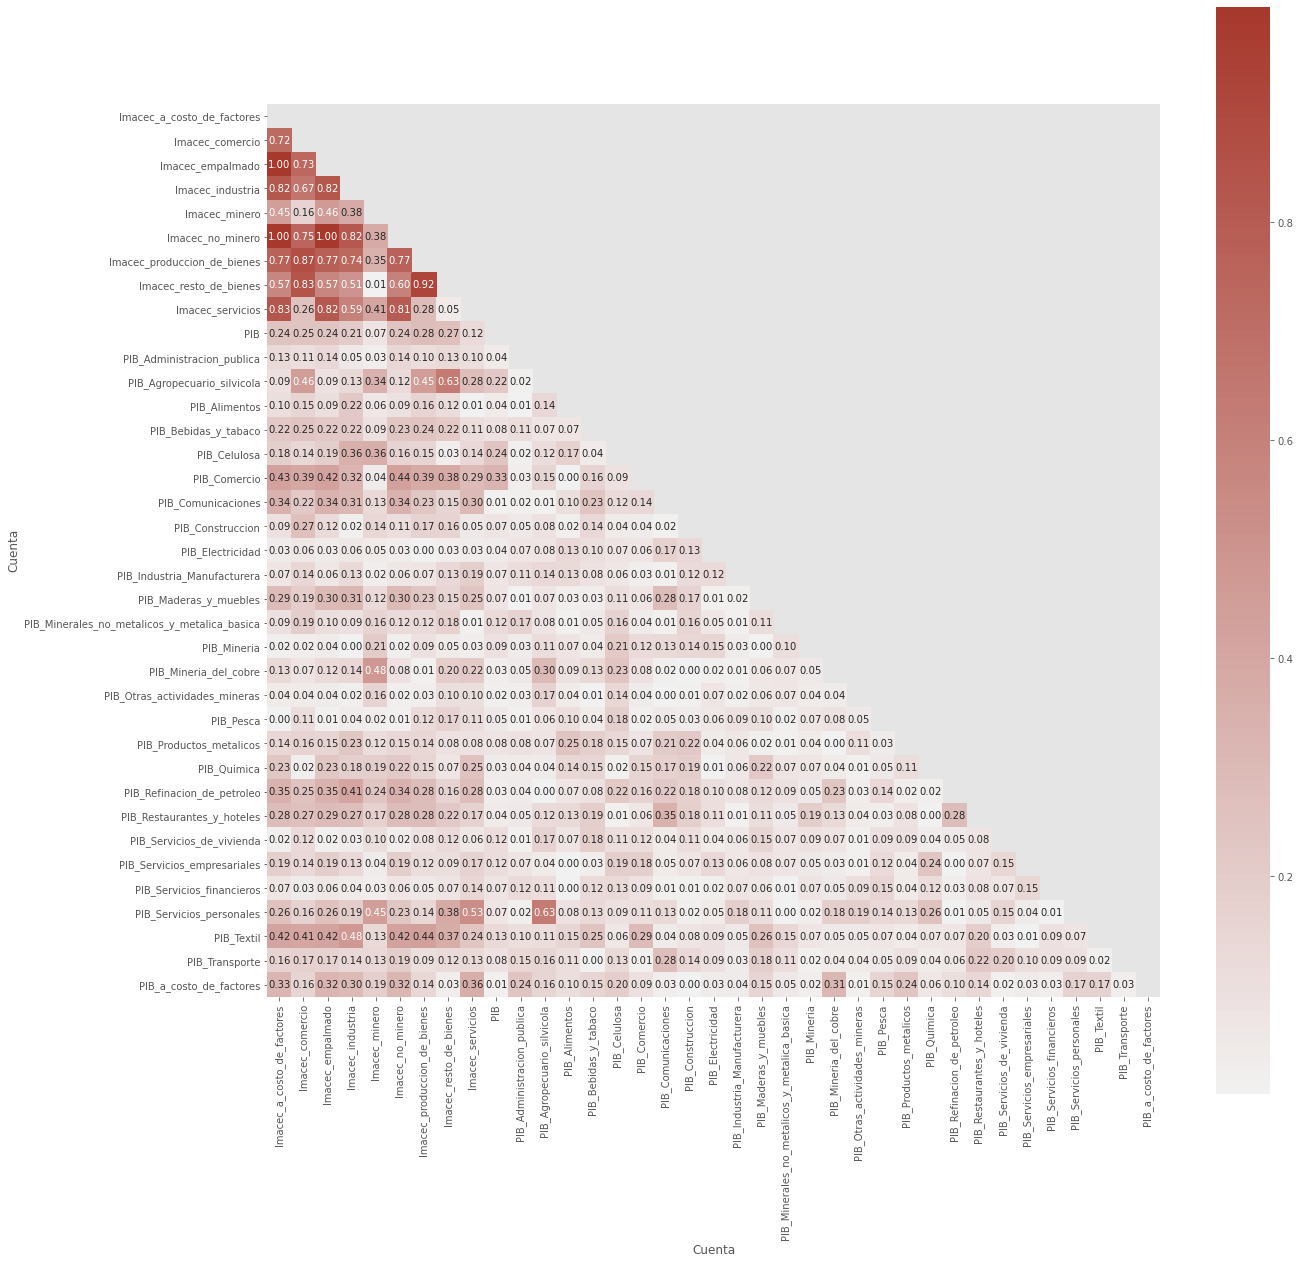

In [26]:
#Lets find the variables that have a correlation of .8 or more in the Banco Central data
to_drop = identify_correlated(bc_df_pv2, threshold=.80)
print (to_drop)

In [27]:
#We can see that the IMACECs are highly correlated, so we can drop them from the data:
bc_df_pv2_reduced = bc_df_pv2.drop(to_drop, axis=1)

['Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago', 'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio', 'La_Araucania']


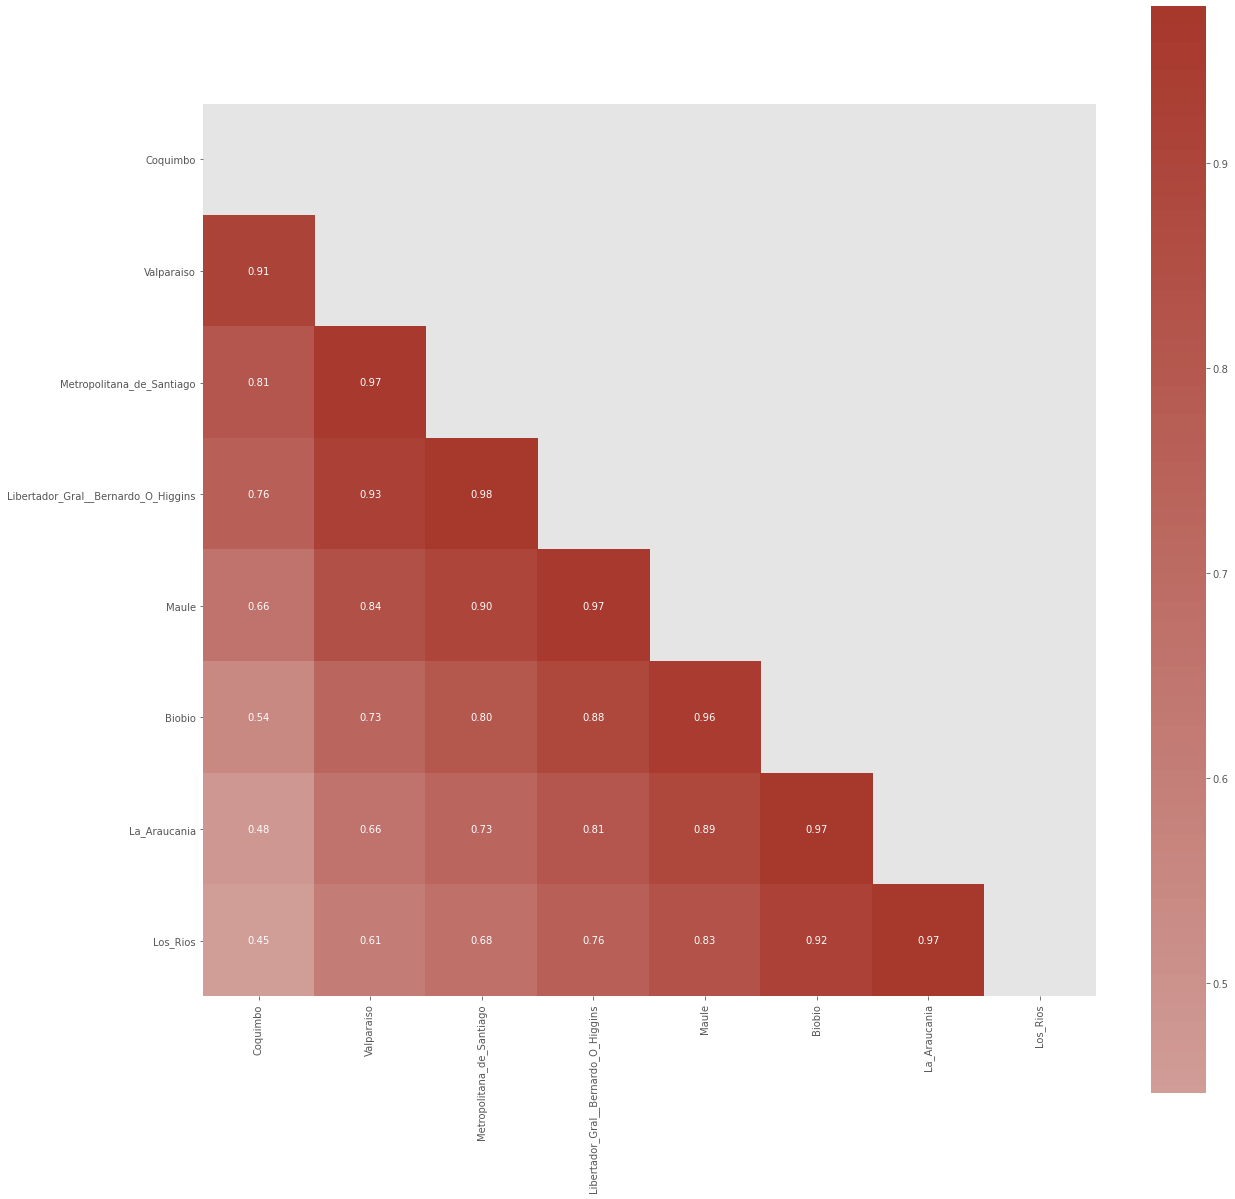

In [28]:
#Now lets find the variables that have a correlation of .85 or more in the Precipitaciones data
to_drop2 = identify_correlated(prec_df, threshold=.85)
print (to_drop2)

In [29]:
#We can see that the rainfalls of almost all the regions are highly correlated, so we can drop them from the data and just
#keep one: Los_Rios
prec_df_reduced = prec_df.drop(to_drop2, axis=1)

Now lets see the behavior of our variable of interest or "dependent variable" (milk price) and how it relates with the independent variables.

In [30]:
#First, merge the banco central data with the milk prices data
#import precio_leche.csv and then create a date column
leche_df = pd.read_csv("./precio_leche.csv")
month_names = {'Ene':1,'Feb':2,'Mar':3,'Abr':4,'May':5,'Jun':6,'Jul':7,'Ago':8,'Sep':9,'Oct':10,'Nov':11,'Dic':12}
leche_df["Num_mes"] = leche_df["Mes"].apply(lambda x: month_names[x])
leche_df["Periodo"] = pd.to_datetime(leche_df.Anio.astype(str) + '/' + leche_df.Num_mes.astype(str) + '/01')
leche_df = leche_df[["Periodo","Precio_leche"]]

#left join with Banco Mundial data
bc_leche = pd.merge(bc_df_pv2_reduced,leche_df,on='Periodo',how='left')

#add the precipitation variable to create a data frame with all the data
#change date column name for the merge
prec_df_reduced = prec_df_reduced.rename(columns={"date": "Periodo"})
final_df = pd.merge(prec_df_reduced,bc_leche,on='Periodo',how='right')

#drop rows with null values in the Los_Rios column
final_df = final_df.dropna()
final_df.head()

,Periodo,Los_Rios,Imacec_minero,Imacec_resto_de_bienes,Imacec_servicios,PIB,PIB_Administracion_publica,PIB_Agropecuario_silvicola,PIB_Alimentos,PIB_Bebidas_y_tabaco,...,PIB_Refinacion_de_petroleo,PIB_Restaurantes_y_hoteles,PIB_Servicios_de_vivienda,PIB_Servicios_empresariales,PIB_Servicios_financieros,PIB_Servicios_personales,PIB_Textil,PIB_Transporte,PIB_a_costo_de_factores,Precio_leche
0,2013-01-01,36.419186,95.178257,107.279578,91.086010,109771386.0,506965418.0,555875498.0,331215957.0,171180702.0,...,99887991.0,209196716.0,821085632.0,123185498.0,571866642.0,762087515.0,310805622.0,53672742.0,100532954.0,186.63
1,2013-02-01,161.760892,85.715182,110.141425,85.557856,104022977.0,509757835.0,622149258.0,330795404.0,165000213.0,...,892533811.0,205024106.0,799789737.0,111314028.0,573744733.0,666776635.0,298216816.0,516098618.0,953924171.0,189.52
2,2013-03-01,73.323954,97.855437,114.994919,100.064328,118109613.0,512994015.0,579846819.0,367818436.0,162692807.0,...,103469519.0,202838669.0,793471519.0,11393886.0,5691837.0,140103913.0,330305467.0,546694889.0,108482797.0,197.60
3,2013-04-01,176.105375,92.733329,102.199311,102.600107,116809697.0,511803995.0,374895706.0,38211344.0,188189562.0,...,824530386.0,209310713.0,80455108.0,121229491.0,565071466.0,144685333.0,380345362.0,544306818.0,107193235.0,201.70
4,2013-05-01,380.996731,96.133164,96.878906,104.083216,116784548.0,512469359.0,311356127.0,37345015.0,184115565.0,...,101629225.0,206481563.0,805307434.0,125792137.0,571394036.0,147859706.0,342850811.0,536681481.0,107210039.0,221.60


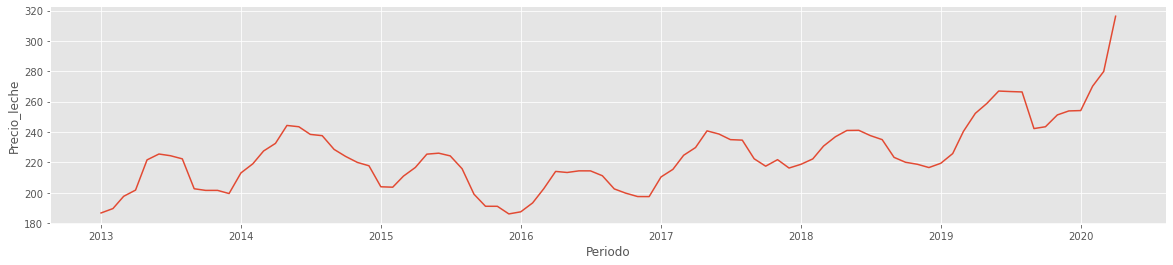

In [31]:
#Lets plot a time series 
fig = plt.gcf()
fig.set_size_inches(20, 4)
sb.lineplot(data = final_df, x="Periodo", y="Precio_leche")
plt.show()

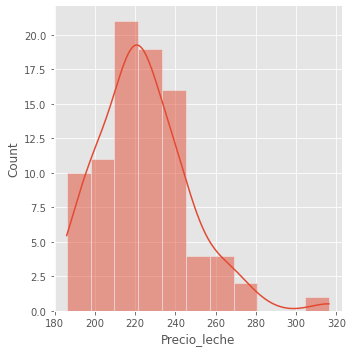

In [32]:
sb.displot(final_df['Precio_leche'],kde=True)
plt.show()

We can see that the milk price has a cyclical behavior, we need to handle seasonality

In [33]:
#check correlation between milk price and all the other variables and drop columns with very little correlation
correlation = final_df.corrwith(final_df["Precio_leche"]).abs()

#check the correlations and save the columns where it is very small
to_drop = []
for index,value in enumerate(correlation):
        if value < 0.1:
            to_drop.append(correlation.index[index])

#drop the columns            
final_df_reduced = final_df.drop(to_drop, axis=1)
print(to_drop)

#convert the date column to be the dataframe index
final_df_reduced.set_index('Periodo', inplace=True)
print(final_df_reduced.shape)

['Imacec_minero', 'Imacec_resto_de_bienes', 'PIB', 'PIB_Administracion_publica', 'PIB_Agropecuario_silvicola', 'PIB_Bebidas_y_tabaco', 'PIB_Comercio', 'PIB_Construccion', 'PIB_Maderas_y_muebles', 'PIB_Minerales_no_metalicos_y_metalica_basica', 'PIB_Mineria_del_cobre', 'PIB_Otras_actividades_mineras', 'PIB_Pesca', 'PIB_Quimica', 'PIB_Restaurantes_y_hoteles', 'PIB_Servicios_de_vivienda', 'PIB_Servicios_empresariales', 'PIB_Transporte']
(88, 15)


In [34]:
#new variables
#final_df_reduced["Quarter"] = pd.DatetimeIndex(final_df_reduced['Periodo']).to_period("Q")
#final_df_reduced["rainfall_mean"] = final_df_reduced.Los_Rios.rolling(window=3).mean()

#create variables that help to capture the cyclical nature of the year.
final_df_reduced['mnth_sin'] = np.sin((final_df_reduced.index.month-1)*(2.*np.pi/12))
final_df_reduced['mnth_cos'] = np.cos((final_df_reduced.index.month-1)*(2.*np.pi/12))

final_df_reduced.head()

,Los_Rios,Imacec_servicios,PIB_Alimentos,PIB_Celulosa,PIB_Comunicaciones,PIB_Electricidad,PIB_Industria_Manufacturera,PIB_Mineria,PIB_Productos_metalicos,PIB_Refinacion_de_petroleo,PIB_Servicios_financieros,PIB_Servicios_personales,PIB_Textil,PIB_a_costo_de_factores,Precio_leche,mnth_sin,mnth_cos
Periodo,,,,,,,,,,,,,,,,,
2013-01-01,36.419186,91.086010,331215957.0,101584107.0,36993507.0,313897882.0,127226524.0,120112803.0,217400907.0,99887991.0,571866642.0,762087515.0,310805622.0,100532954.0,186.63,0.000000,1.000000e+00
2013-02-01,161.760892,85.557856,330795404.0,903589376.0,321339691.0,292167833.0,117429317.0,108170617.0,192074415.0,892533811.0,573744733.0,666776635.0,298216816.0,953924171.0,189.52,0.500000,8.660254e-01
2013-03-01,73.323954,100.064328,367818436.0,974948182.0,337915263.0,301314934.0,130648285.0,123491343.0,212409058.0,103469519.0,5691837.0,140103913.0,330305467.0,108482797.0,197.60,0.866025,5.000000e-01
2013-04-01,176.105375,102.600107,38211344.0,945996965.0,348801015.0,280438294.0,133442735.0,11702736.0,224791502.0,824530386.0,565071466.0,144685333.0,380345362.0,107193235.0,201.70,1.000000,6.123234e-17
2013-05-01,380.996731,104.083216,37345015.0,104685345.0,355711814.0,274899817.0,134668498.0,121317874.0,228198491.0,101629225.0,571394036.0,147859706.0,342850811.0,107210039.0,221.60,0.866025,-5.000000e-01


## Model: Random Forest

In [35]:
#create subsets for cross validation
X = final_df_reduced.drop('Precio_leche',axis=1)
y = final_df_reduced.loc[X.index,'Precio_leche']
X_train = X.loc[:"2018-12-01"]
y_train = y.loc[:"2018-12-01"]
X_test = X.loc["2019-01-01":]
y_test = y.loc["2019-01-01":]

The data was splitted in two subsets: one for training the model, which takes the first 80% of the data sorted by date (first 6 years), and the remaining 20% is used to test the model. I chose this 80%-20% proportion because in the literature we can find that as a standard.

In [36]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
milk_price_predictions = forest_model.predict(X_test)
print(milk_price_predictions)

print('Mean Absolute Error in $CLP:', metrics.mean_absolute_error(y_test, milk_price_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, milk_price_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, milk_price_predictions)))

[205.317  208.0585 213.8299 213.6627 238.3268 236.4459 235.9672 233.1224
 204.8666 206.5298 208.7494 210.1099 210.5588 208.0749 207.8359 211.1793]
Mean Absolute Error in $CLP: 40.93781249999994
Mean Squared Error: 2159.756614994998
Root Mean Squared Error: 46.47318167497248


In [37]:
print(y_test)
print("Average: ",y_test.mean())

Periodo
2019-01-01    219.38
2019-02-01    225.76
2019-03-01    240.39
2019-04-01    252.26
2019-05-01    258.76
2019-06-01    266.96
2019-07-01    266.63
2019-08-01    266.37
2019-09-01    242.23
2019-10-01    243.44
2019-11-01    251.22
2019-12-01    253.86
2020-01-01    254.10
2020-02-01    270.15
2020-03-01    279.88
2020-04-01    316.25
Name: Precio_leche, dtype: float64
Average:  256.72749999999996


We can see that the error is, in average, 40 CLP. The average of the prices in y_test is 256 CLP, so the 40 CLP are near 15% of the average milk price, which means this is not a good prediction. 

We can also see that the predictions are always below the real price, specially for 2020, and this can be explained by the effects of the pandemic, which has caused prices to rise faster than normal, so another kind of data to add to mthe model would be some statistics regarding the pandemic effects.

In [38]:
#now lets try with different number of max leaf nodes and calculate the different MAEs
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, predictions)
    return(mae)

for i in [3,30,300,3000]:
    mae=get_mae(i, X_train, X_test, y_train, y_test)
    print("Max leaf nodes",i,"-----> MAE:", mae)

Max leaf nodes 3 -----> MAE: 42.69792360084049
Max leaf nodes 30 -----> MAE: 39.996527554563485
Max leaf nodes 300 -----> MAE: 40.00407499999995
Max leaf nodes 3000 -----> MAE: 40.00407499999995


## Conclusions

- Trying with different number of max leaf nodes doesn't help much, the MAE remains almost the same, but 30 leaf nodes is the best approach.

- Looking at the Error metrics, the model is not that good predicting the milk prices, which may indicate several things:

    - The outliers in the PIB data caused noise when predicting milk price.
    - We would need more, or different, independent variables to predict in a better way the milk price. For example: Per capita consumption of milk in Chile through these years, productive data of the milk industry and, as mentioned before, data related with COVID.
    - Maybe a Random Forest is not the best approach, we could try with other kind of models like XGBoost

- In general, this kind of models can be used to predict not only prices of products from any type of business, but also can predict many other kind of variables such as the demand for a specific product, the costs of manufature, amount of fuel neededm etc... For example, we could predict the price of houses for sell having historical data and other variables such as number of bedrooms and bathrooms, geographic location, yard size, etc. 

- In particular, this kind of machine learning model could help to tackle the climate change in several ways. For example, they could help to predict the amount of water or energy a milk factory would need, so they can make their processes more efficient in this terms. Or they could also help to optimize supply chains by predicting the quantity of raw material and animals will be needed and also predicting the demand, therefore reducing overproduction and materials waste.